In [1]:
# Enable autoreload for development
import IPython
ipython = IPython.get_ipython()
ipython.run_line_magic('load_ext', 'autoreload')
ipython.run_line_magic('autoreload', '2')

# Auxiliar imports
import sys, os, time
import matplotlib.pyplot as plt
import numpy as np

# Gym imports
import gym
from gym.vector import SyncVectorEnv

# PyTorch imports
import torch
from torch import nn, optim

# Custom imports
sys.path.append(os.path.abspath('..')) # Add parent directory to path

from ppo_network import PPONetworkDiscrete
from ppo import PPODiscrete
from hp_tuner import HPTuner

In [2]:
# LunarLander environment
env_id = 'LunarLander-v2'
max_episode_steps = 1024
num_envs = 16

env_kwargs = {
    'id': env_id,
    'max_episode_steps': max_episode_steps,
}

# Create vectorized environment
envs_vector = SyncVectorEnv([lambda: gym.make(**env_kwargs)] * num_envs)
states, infos = envs_vector.reset()

In [3]:
# Policy-Value Network
network_kwargs = {
    'input_dims': 8,
    'output_dims': 4,
    'shared_hidden_dims': [1024, 512, 256],
    'shared_norm': nn.LayerNorm,
    'shared_activation': nn.SiLU,
    'policy_hidden_dims': [256, 128, 64],
    'policy_norm': nn.LayerNorm,
    'policy_activation': nn.SiLU,
    'value_hidden_dims': [256, 128, 64],
    'value_norm': nn.LayerNorm,
    'value_activation': nn.SiLU,
}

# Create policy-value network
network = PPONetworkDiscrete(**network_kwargs)

In [4]:
# Test forward passes
for _ in range(3):
    states_tensor = torch.tensor(states, dtype=torch.float32)
    policy, value = network(states_tensor)
    
    actions_dist = torch.distributions.Categorical(logits=policy)
    actions = actions_dist.sample().numpy()
    
    states, rewards, dones, truncateds, infos = envs_vector.step(actions)
    print(f"State: {states[0]}"[:65])

State: [ 0.00401888  1.4172734   0.20324497  0.12833907 -0.004599
State: [ 0.00593205  1.4195678   0.19116196  0.1019704  -0.004451
State: [ 0.00794182  1.4212598   0.203281    0.07519662 -0.006734


/Users/axelsolhall/miniconda3/envs/PPOgym/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
# PPO hyperparameters
ppo_kwargs = {
    'network_class': PPONetworkDiscrete,
    'network_kwargs': network_kwargs,
    'num_envs': num_envs,
    'lr': 3e-4,
    'final_lr': 5e-6,
    'gamma': 0.995,
    'lam': 0.99,
    'clip_eps': 0.25,
    'final_clip_eps': 0.01,
    'value_coef': 0.7,
    'entropy_coef': 0.1,
    'final_entropy_coef': 0.025,
    'batch_size': 2048,
    'mini_batch_size': 256,
    'batch_epochs': 8,
    'batch_shuffle': True,
    'seperate_envs_shuffle': True,
    'reward_normalization': True,
    'truncated_reward': -300,
    'debug_prints': False,
}

ppo = PPODiscrete(envs_vector, network, **ppo_kwargs)

# Test training
ppo.train(generations=1)

array([-74.83])

Optimizing lr with values: [0.001, 0.0003, 0.0001]
Running trials for lr = 0.001
Running trials for lr = 0.0003
Running trials for lr = 0.0001
Best value for lr: 0.001


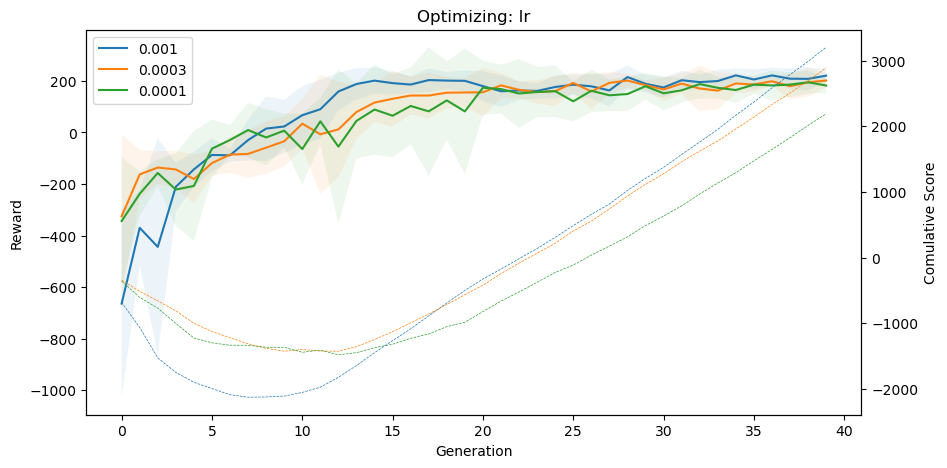

Optimizing lam with values: [0.95, 0.99, 0.995]
Running trials for lam = 0.95
Skipping lam = 0.99, score: 3202.68
Running trials for lam = 0.995
Best value for lam: 0.99
No change in lam, no change ratio: 0.1


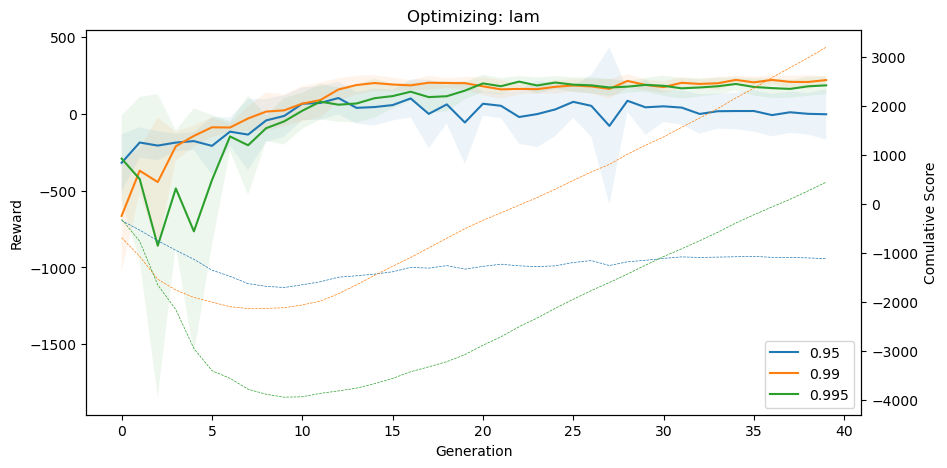

Optimizing gamma with values: [0.98, 0.99, 0.995, 0.999]
Running trials for gamma = 0.98
Running trials for gamma = 0.99
Skipping gamma = 0.995, score: 3202.68
Running trials for gamma = 0.999
Best value for gamma: 0.98


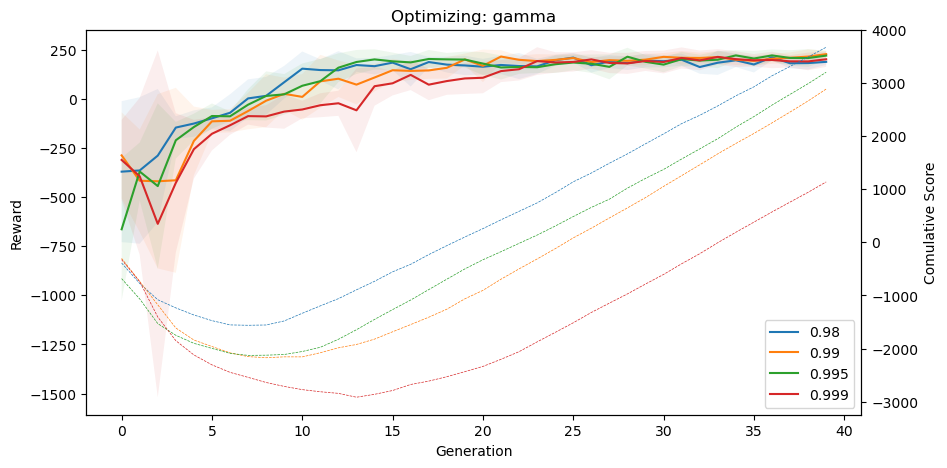

Optimizing value_coef with values: [0.495, 0.7, 0.9899]
Running trials for value_coef = 0.495
Skipping value_coef = 0.7, score: 3673.43
Running trials for value_coef = 0.9899
Best value for value_coef: 0.7
No change in value_coef, no change ratio: 0.1


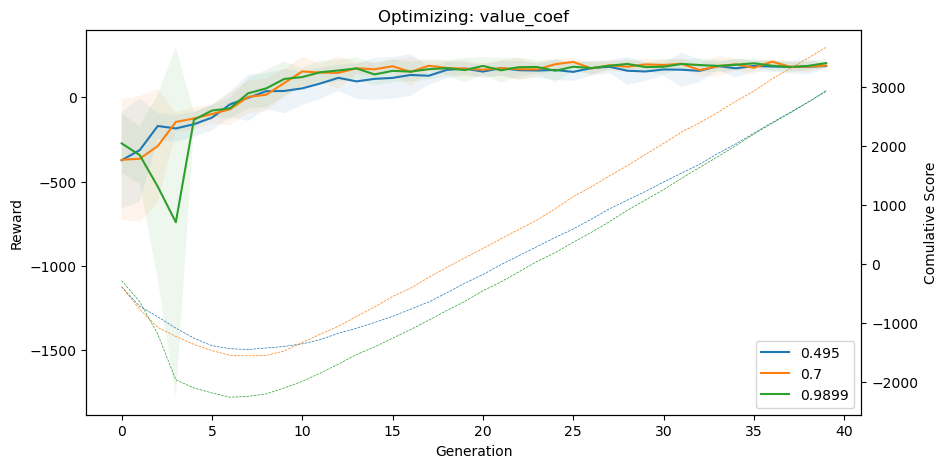

Optimizing entropy_coef with values: [0.0707, 0.1, 0.1414]
Running trials for entropy_coef = 0.0707
Skipping entropy_coef = 0.1, score: 3673.43
Running trials for entropy_coef = 0.1414
Best value for entropy_coef: 0.1
No change in entropy_coef, no change ratio: 0.2


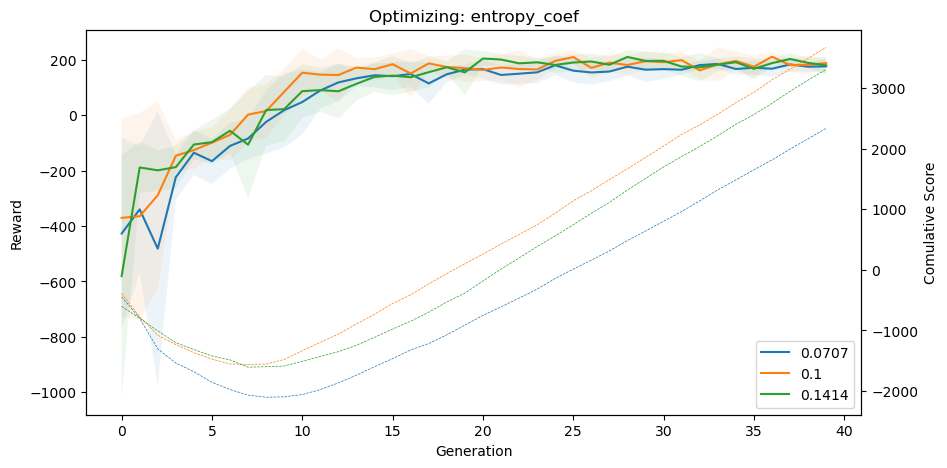

Optimizing clip_eps with values: [0.1768, 0.25, 0.3536]
Running trials for clip_eps = 0.1768
Skipping clip_eps = 0.25, score: 3673.43
Running trials for clip_eps = 0.3536
Best value for clip_eps: 0.25
No change in clip_eps, no change ratio: 0.3


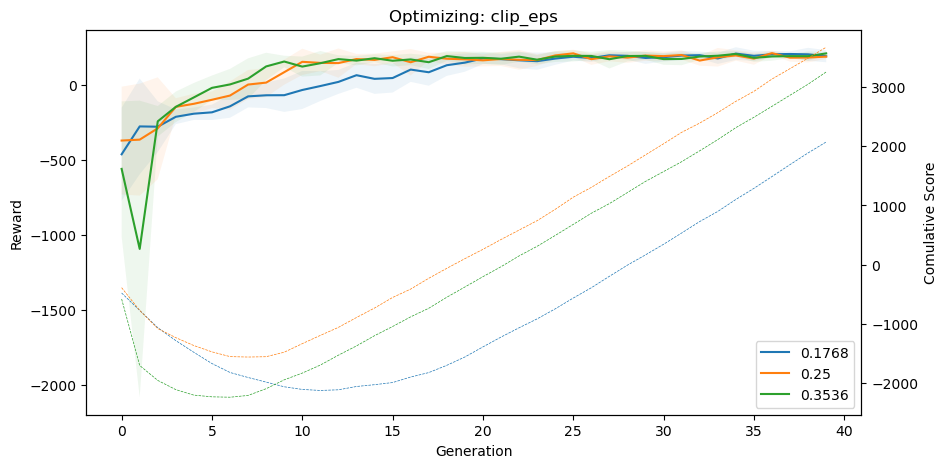

Optimizing mini_batch_size with values: [181, 256, 362]
Running trials for mini_batch_size = 181
Skipping mini_batch_size = 256, score: 3673.43
Running trials for mini_batch_size = 362
Best value for mini_batch_size: 256
No change in mini_batch_size, no change ratio: 0.4


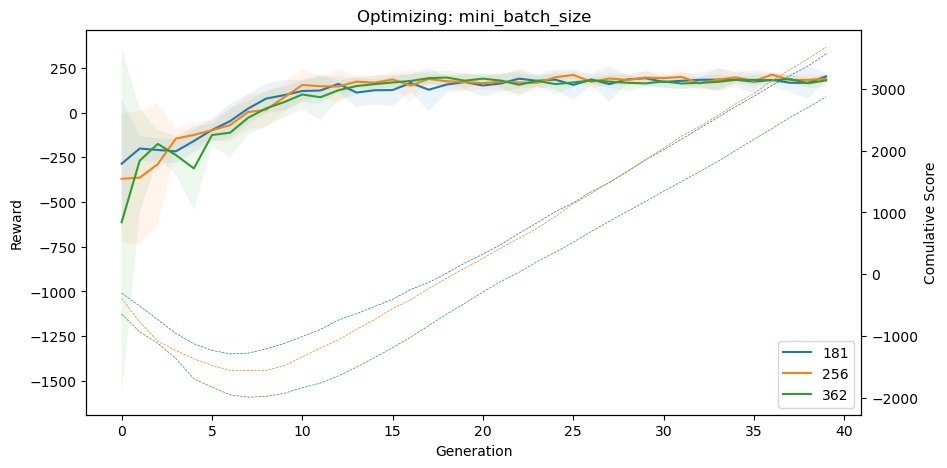

Optimizing batch_epochs with values: [6, 8, 11]
Running trials for batch_epochs = 6
Skipping batch_epochs = 8, score: 3673.43
Running trials for batch_epochs = 11
Best value for batch_epochs: 8
No change in batch_epochs, no change ratio: 0.5


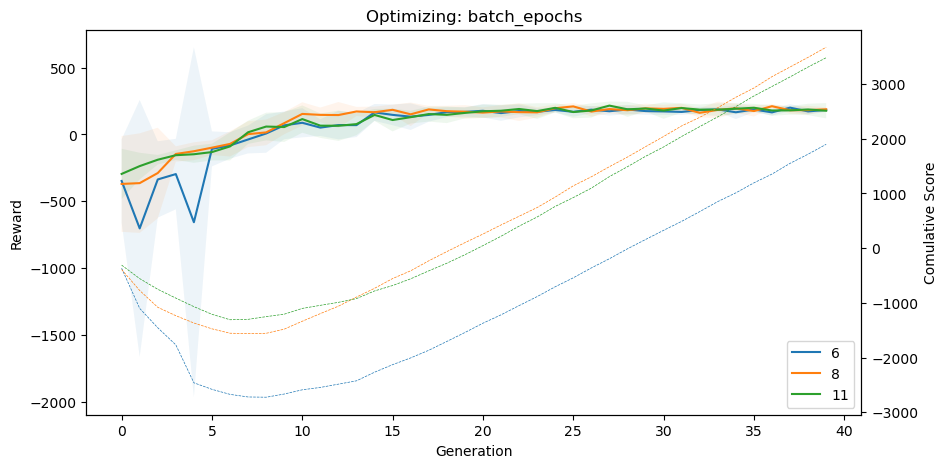

Optimizing batch_shuffle with values: [True, False]
Skipping batch_shuffle = True, score: 3673.43
Running trials for batch_shuffle = False
Best value for batch_shuffle: False


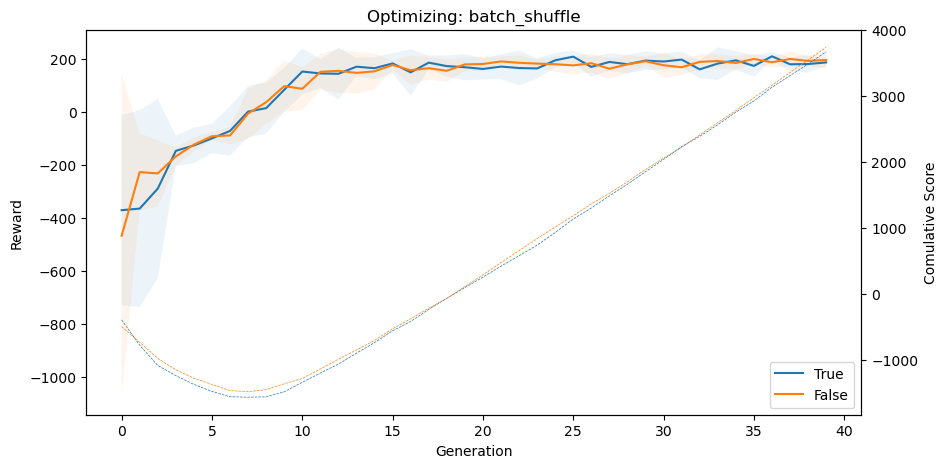

Optimizing reward_normalization with values: [True, False]
Skipping reward_normalization = True, score: 3741.86
Running trials for reward_normalization = False
Best value for reward_normalization: True
No change in reward_normalization, no change ratio: 0.1


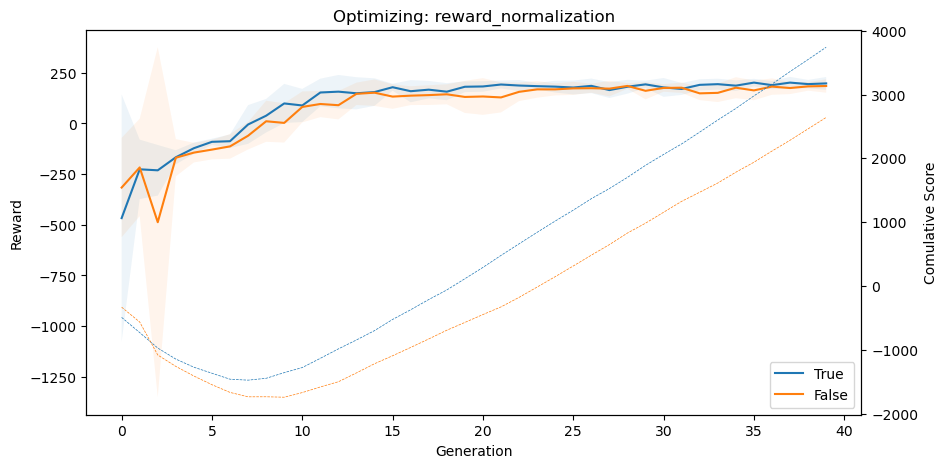

Optimizing lr with values: [0.001, 0.0003, 0.0001]
Skipping lr = 0.001, score: 3741.86
Running trials for lr = 0.0003
Running trials for lr = 0.0001
Best value for lr: 0.001
No change in lr, no change ratio: 0.2


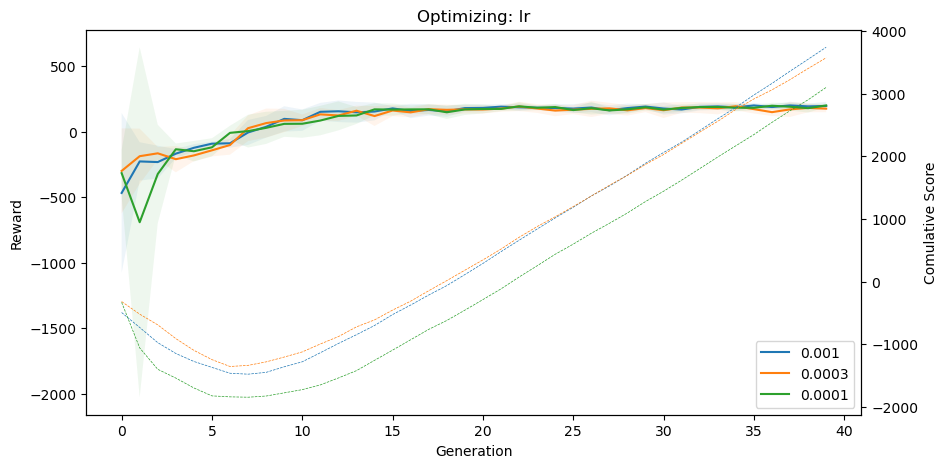

Optimizing lam with values: [0.95, 0.99, 0.995]
Running trials for lam = 0.95
Skipping lam = 0.99, score: 3741.86
Running trials for lam = 0.995
Best value for lam: 0.99
No change in lam, no change ratio: 0.3


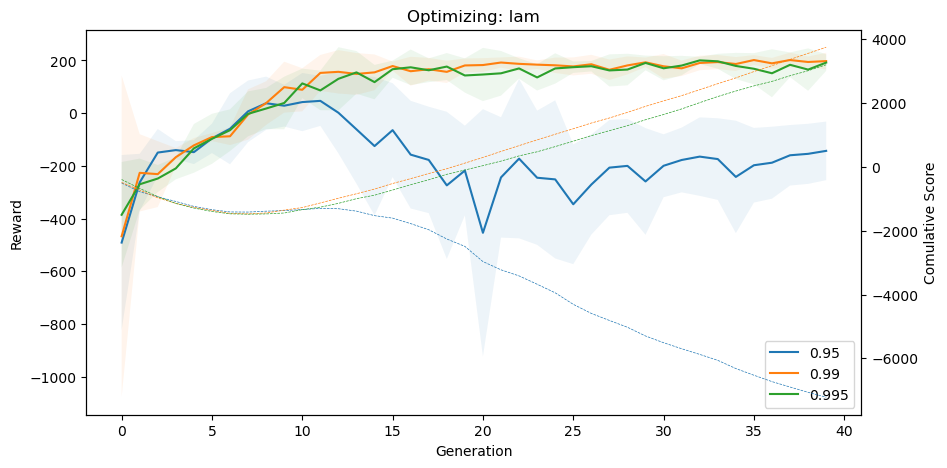

Optimizing gamma with values: [0.98, 0.99, 0.995, 0.999]
Skipping gamma = 0.98, score: 3741.86
Running trials for gamma = 0.99
Running trials for gamma = 0.995
Running trials for gamma = 0.999
Best value for gamma: 0.98
No change in gamma, no change ratio: 0.4


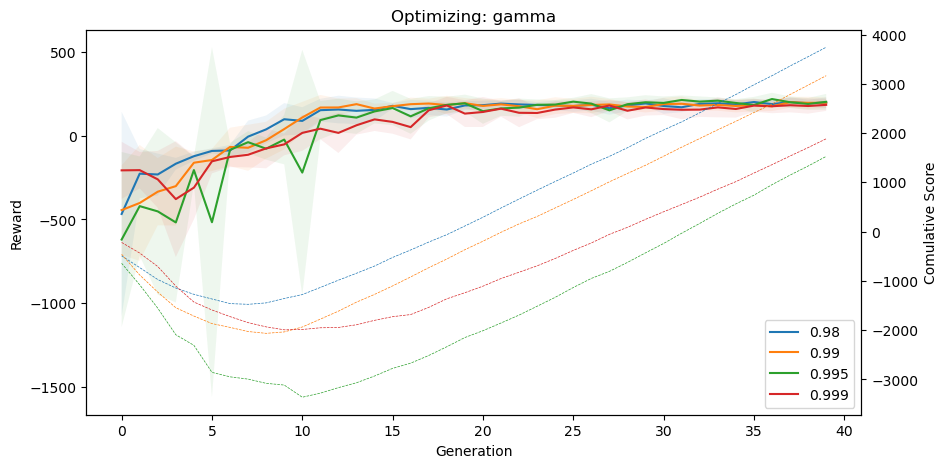

Optimizing value_coef with values: [0.495, 0.7, 0.9899]
Running trials for value_coef = 0.495
Skipping value_coef = 0.7, score: 3741.86
Running trials for value_coef = 0.9899
Best value for value_coef: 0.9899


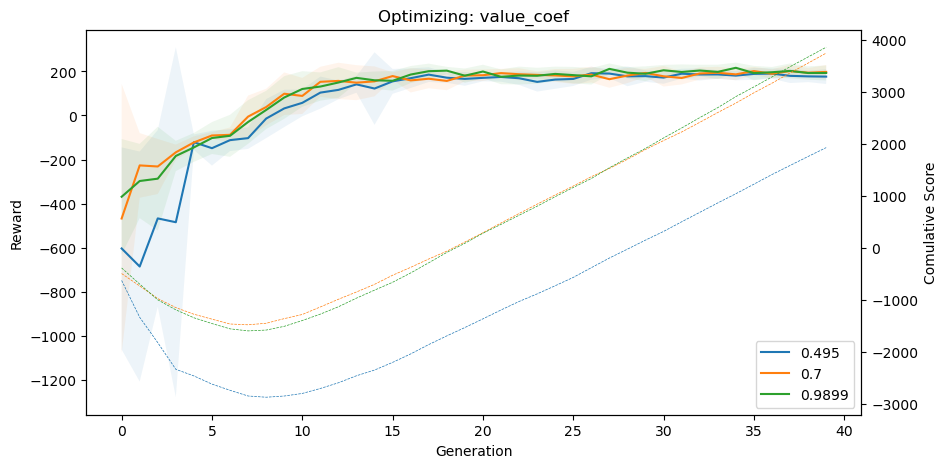

Optimizing entropy_coef with values: [0.0707, 0.1, 0.1414]
Running trials for entropy_coef = 0.0707
Skipping entropy_coef = 0.1, score: 3854.62
Running trials for entropy_coef = 0.1414
Best value for entropy_coef: 0.1
No change in entropy_coef, no change ratio: 0.1


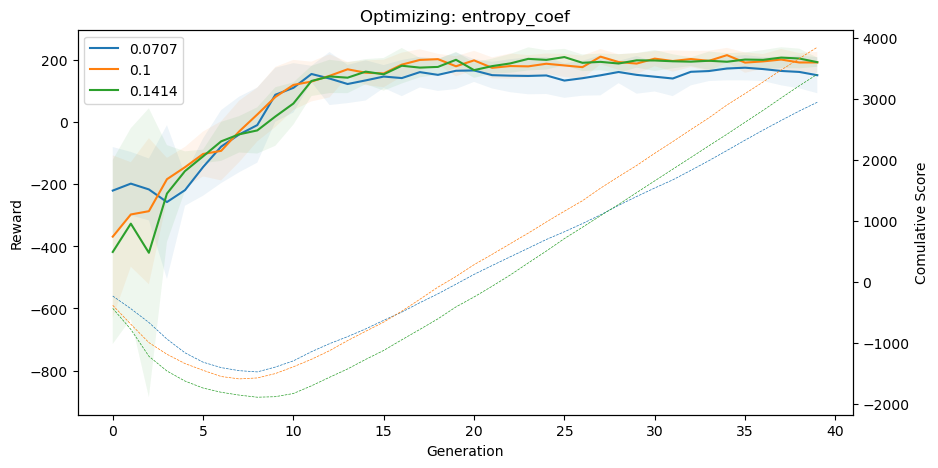

Optimizing clip_eps with values: [0.1768, 0.25, 0.3536]
Running trials for clip_eps = 0.1768
Skipping clip_eps = 0.25, score: 3854.62
Running trials for clip_eps = 0.3536
Best value for clip_eps: 0.3536


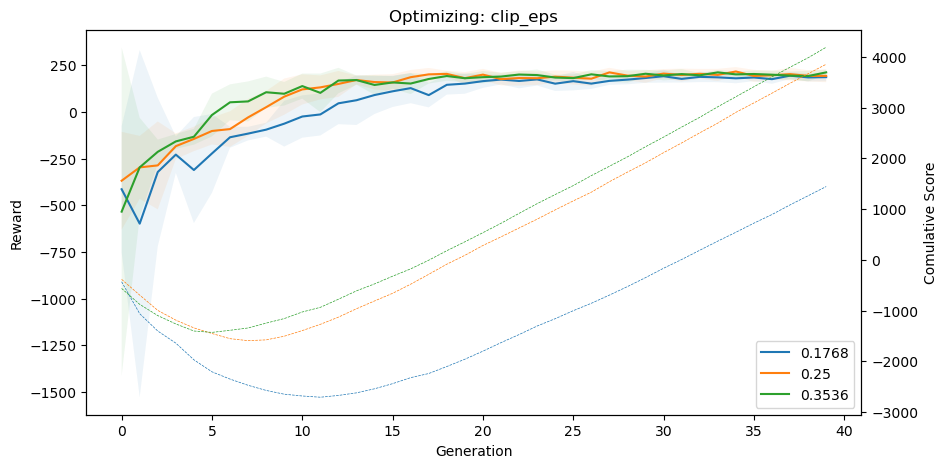

Optimizing mini_batch_size with values: [181, 256, 362]
Running trials for mini_batch_size = 181
Skipping mini_batch_size = 256, score: 4190.04
Running trials for mini_batch_size = 362
Best value for mini_batch_size: 256
No change in mini_batch_size, no change ratio: 0.1


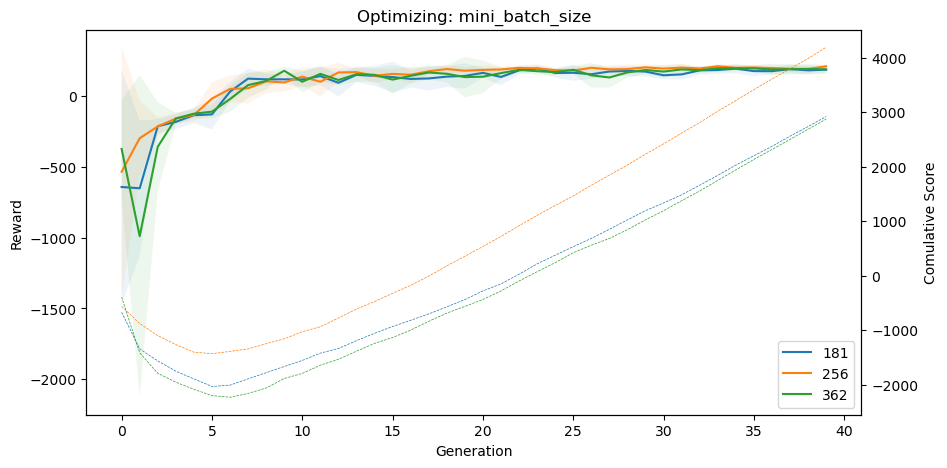

Optimizing batch_epochs with values: [6, 8, 11]
Running trials for batch_epochs = 6
Skipping batch_epochs = 8, score: 4190.04
Running trials for batch_epochs = 11
Best value for batch_epochs: 8
No change in batch_epochs, no change ratio: 0.2


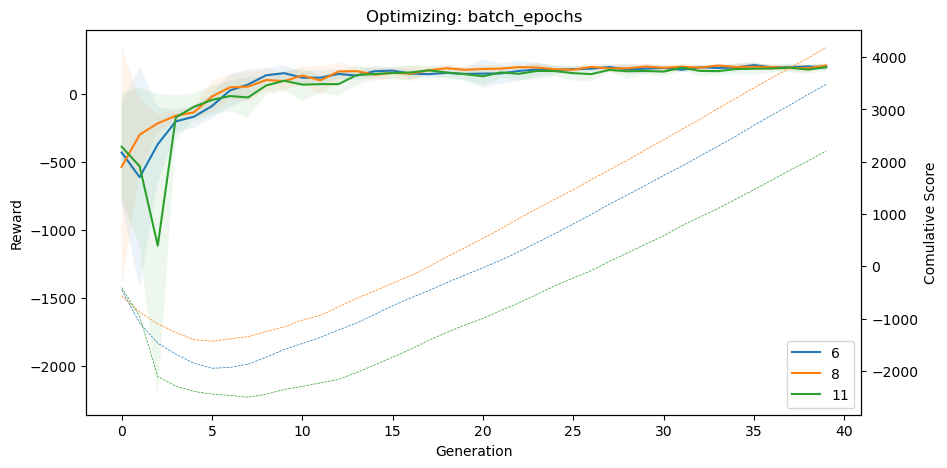

Optimizing batch_shuffle with values: [False, True]
Skipping batch_shuffle = False, score: 4190.04
Running trials for batch_shuffle = True
Best value for batch_shuffle: True


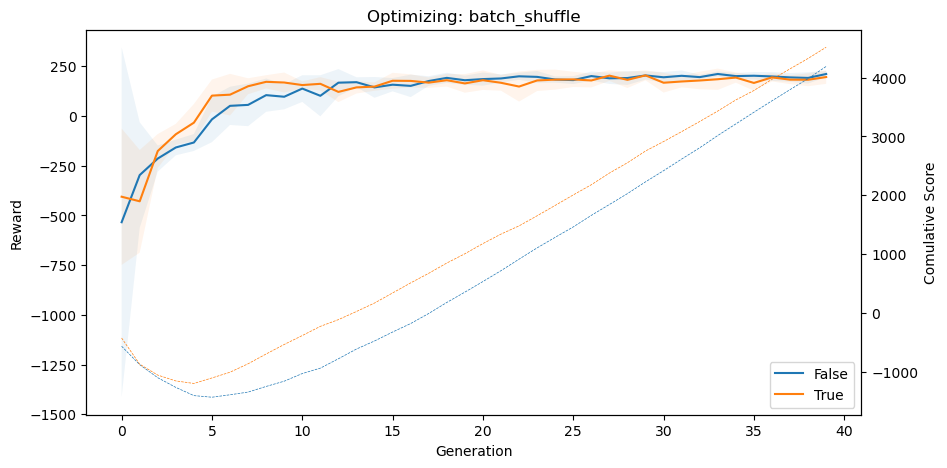

Optimizing reward_normalization with values: [True, False]
Skipping reward_normalization = True, score: 4516.39
Running trials for reward_normalization = False
Best value for reward_normalization: True
No change in reward_normalization, no change ratio: 0.1


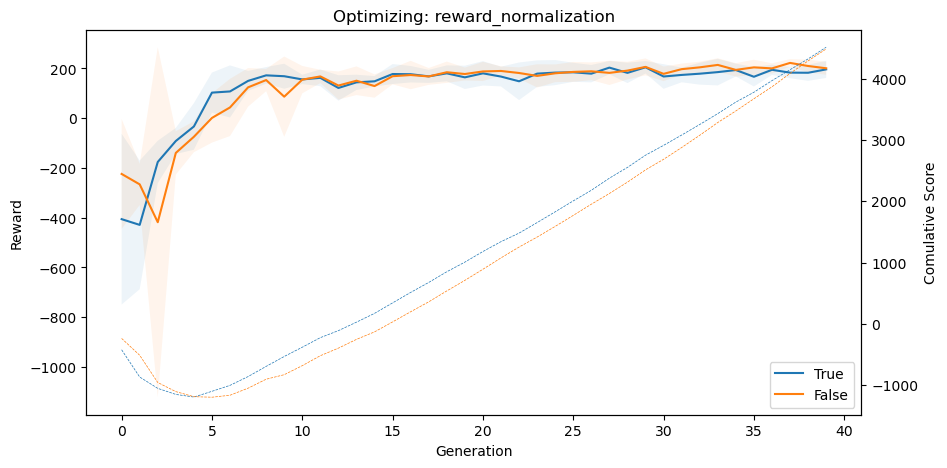

Optimizing lr with values: [0.001, 0.0003, 0.0001]
Skipping lr = 0.001, score: 4516.39
Running trials for lr = 0.0003
Running trials for lr = 0.0001
Best value for lr: 0.001
No change in lr, no change ratio: 0.2


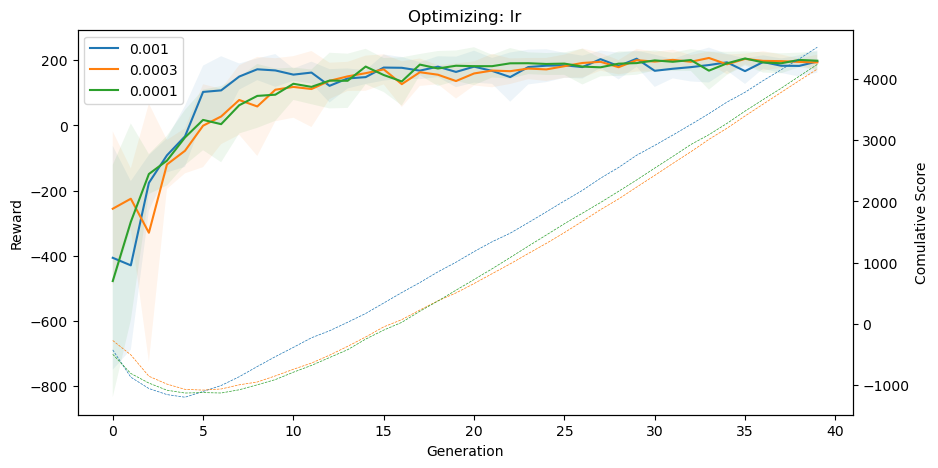

Optimizing lam with values: [0.95, 0.99, 0.995]
Running trials for lam = 0.95
Skipping lam = 0.99, score: 4516.39
Running trials for lam = 0.995
Best value for lam: 0.99
No change in lam, no change ratio: 0.3


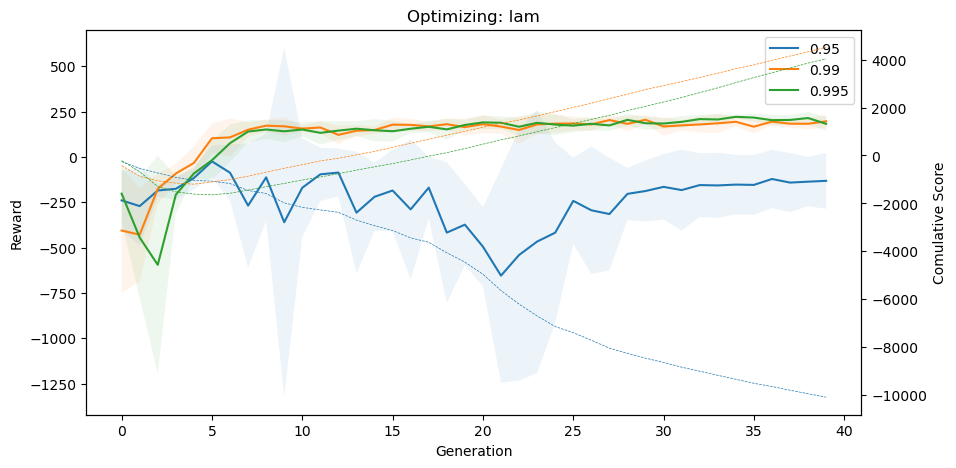

Optimizing gamma with values: [0.98, 0.99, 0.995, 0.999]
Skipping gamma = 0.98, score: 4516.39
Running trials for gamma = 0.99
Running trials for gamma = 0.995
Running trials for gamma = 0.999
Best value for gamma: 0.98
No change in gamma, no change ratio: 0.4


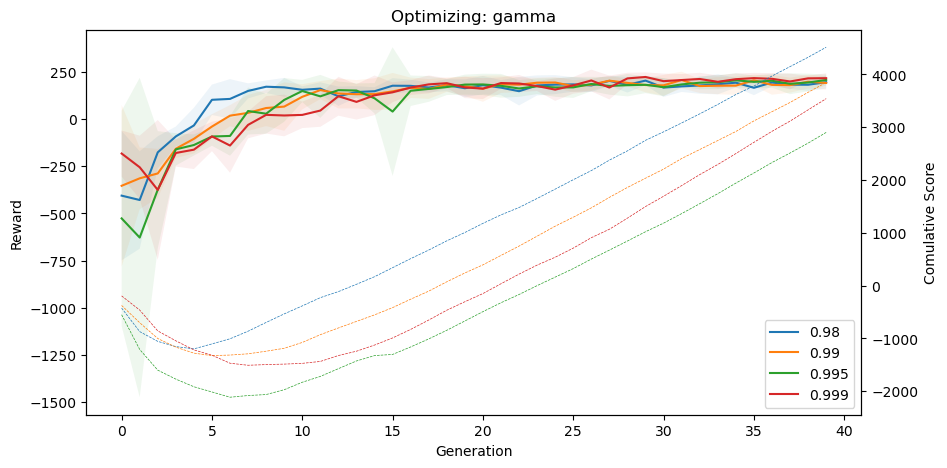

Optimizing value_coef with values: [0.7, 0.9899, 1.3999]
Skipping value_coef = 0.7, score: 3255.57
Skipping value_coef = 0.9899, score: 4516.39
Running trials for value_coef = 1.3999
Best value for value_coef: 0.9899
No change in value_coef, no change ratio: 0.5


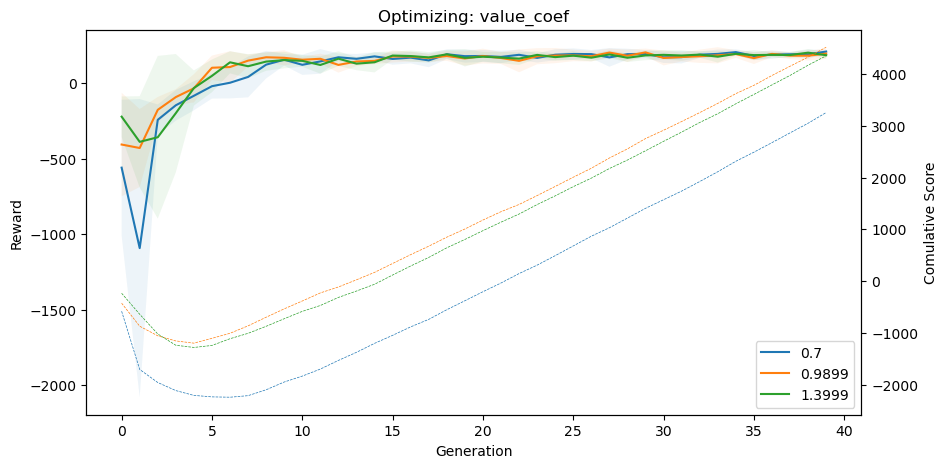

Optimizing entropy_coef with values: [0.0707, 0.1, 0.1414]
Running trials for entropy_coef = 0.0707
Skipping entropy_coef = 0.1, score: 4516.39
Running trials for entropy_coef = 0.1414
Best value for entropy_coef: 0.1
No change in entropy_coef, no change ratio: 0.6


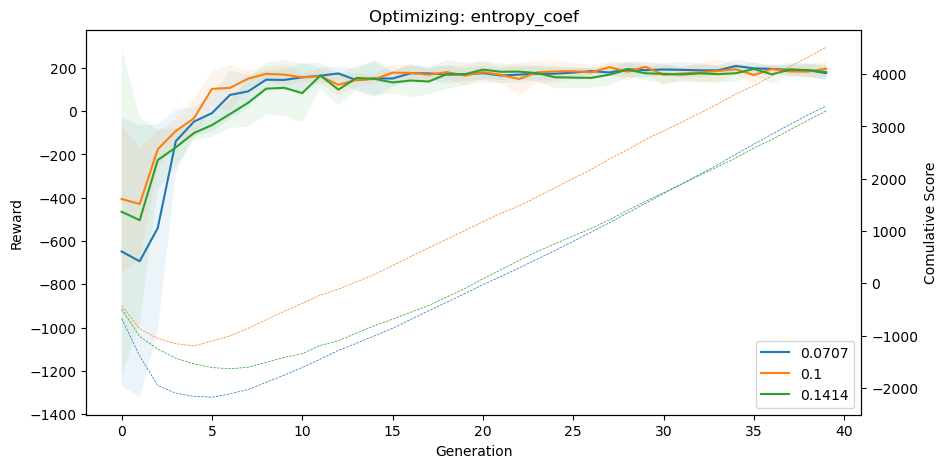

Optimizing clip_eps with values: [0.25, 0.3536, 0.5001]
Skipping clip_eps = 0.25, score: 2937.47
Skipping clip_eps = 0.3536, score: 4516.39
Running trials for clip_eps = 0.5001
Best value for clip_eps: 0.3536
No change in clip_eps, no change ratio: 0.7


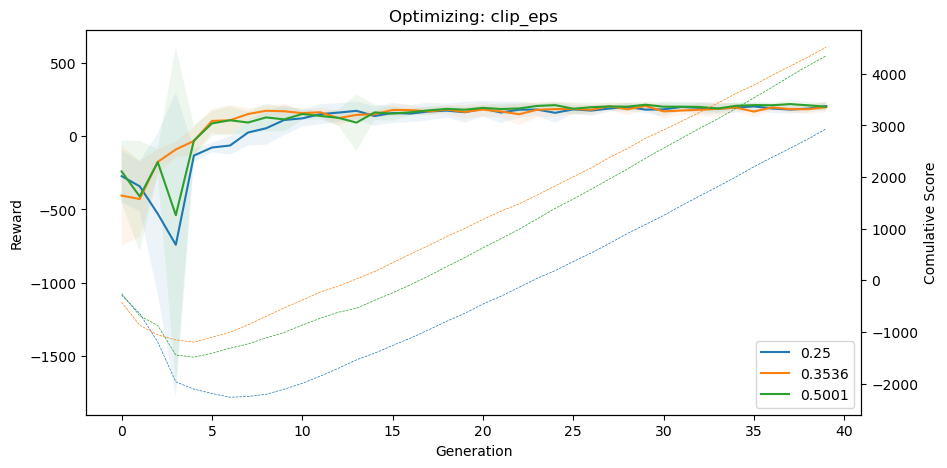

Optimizing mini_batch_size with values: [181, 256, 362]
Running trials for mini_batch_size = 181
Skipping mini_batch_size = 256, score: 4516.39
Running trials for mini_batch_size = 362
Best value for mini_batch_size: 362


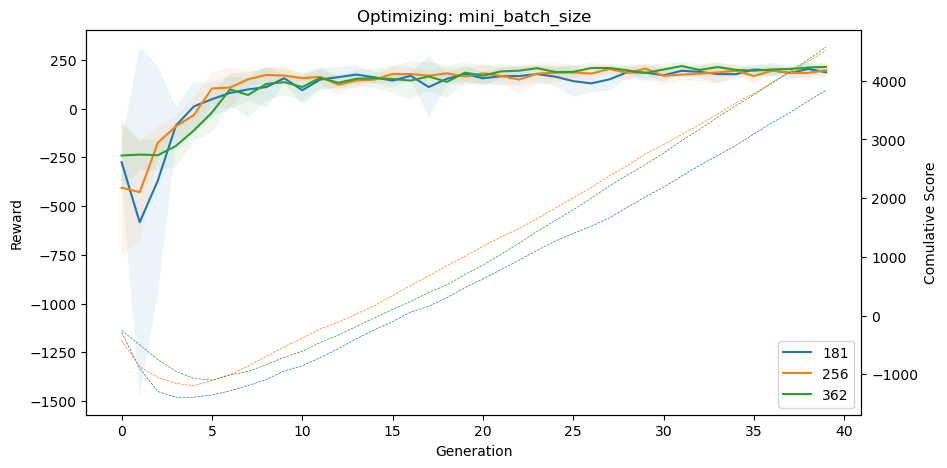

Optimizing batch_epochs with values: [6, 8, 11]
Running trials for batch_epochs = 6
Skipping batch_epochs = 8, score: 4570.06
Running trials for batch_epochs = 11
Best value for batch_epochs: 8
No change in batch_epochs, no change ratio: 0.1


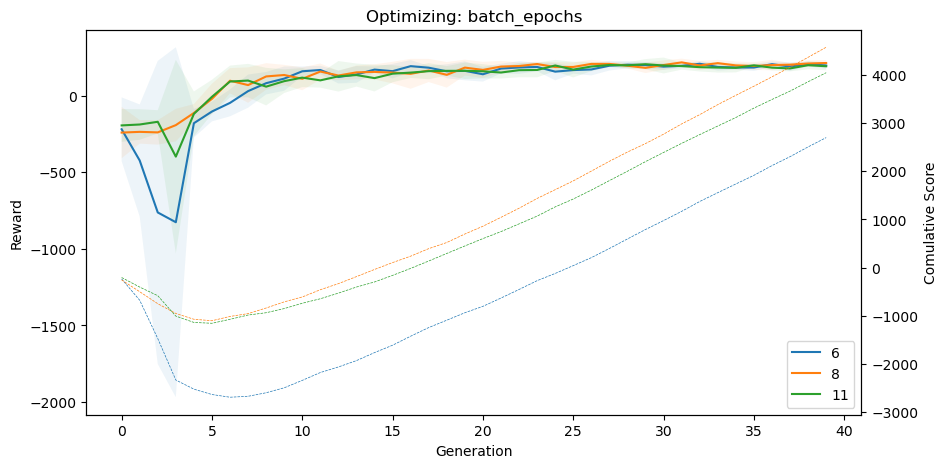

Optimizing batch_shuffle with values: [True, False]
Skipping batch_shuffle = True, score: 4570.06
Skipping batch_shuffle = False, score: 2871.45
Best value for batch_shuffle: True
No change in batch_shuffle, no change ratio: 0.2


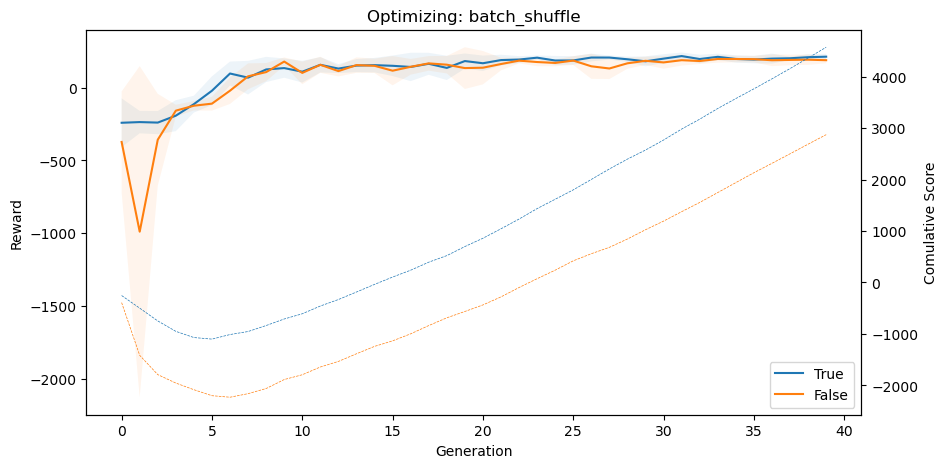

Optimizing reward_normalization with values: [True, False]
Skipping reward_normalization = True, score: 4570.06
Running trials for reward_normalization = False
Best value for reward_normalization: True
No change in reward_normalization, no change ratio: 0.3


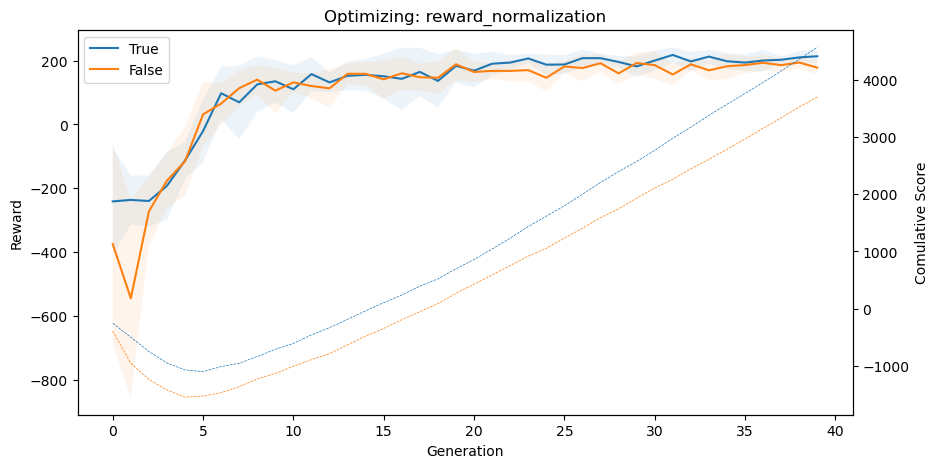

Optimizing lr with values: [0.001, 0.0003, 0.0001]
Skipping lr = 0.001, score: 4570.06
Running trials for lr = 0.0003
Running trials for lr = 0.0001
Best value for lr: 0.0003


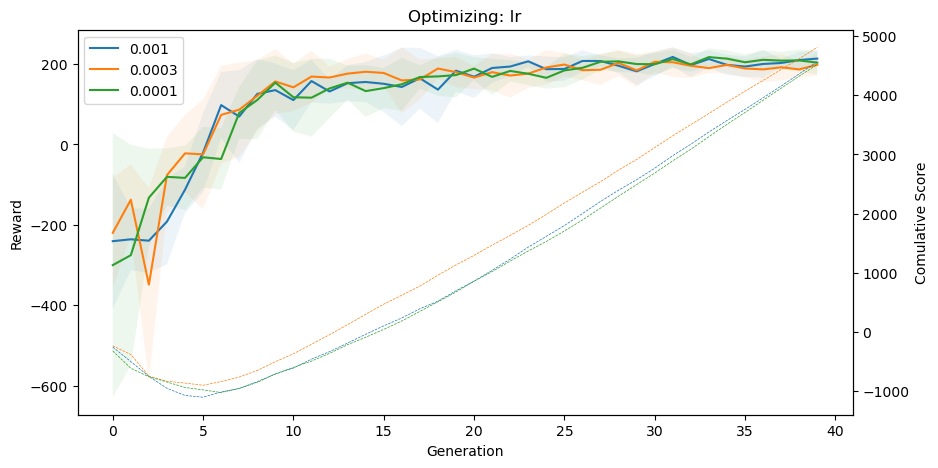

Optimizing lam with values: [0.95, 0.99, 0.995]
Running trials for lam = 0.95
Skipping lam = 0.99, score: 4810.75
Running trials for lam = 0.995
Best value for lam: 0.99
No change in lam, no change ratio: 0.1


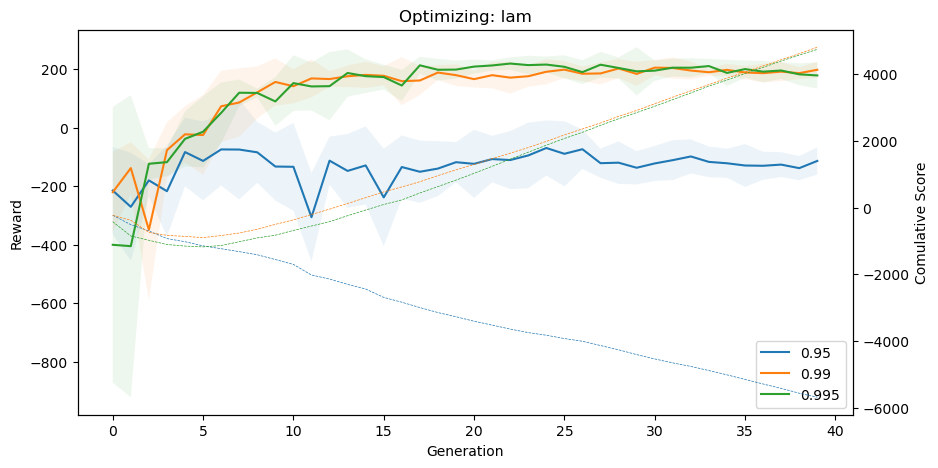

Optimizing gamma with values: [0.98, 0.99, 0.995, 0.999]
Skipping gamma = 0.98, score: 4810.75
Running trials for gamma = 0.99
Running trials for gamma = 0.995
Running trials for gamma = 0.999


In [ ]:
# Hyperparameter tuning
hp_tuner = HPTuner(
    env_kwargs=env_kwargs,
    num_envs=num_envs,
    ppo_class=PPODiscrete,
    ppo_kwargs=ppo_kwargs,
)

# Define hyperparameters to optimize
parameters = [ 
    ('lr', [1e-3, 3e-4, 1e-4]),
    ('lam', [0.95, 0.99, 0.995]),
    ('gamma', [0.98, 0.99, 0.995, 0.999]),
    'value_coef',
    'entropy_coef',
    'clip_eps',
    'mini_batch_size',
    'batch_epochs',
    'batch_shuffle',
    'reward_normalization',
]    

# Optimize hyperparameters
evolutions = hp_tuner.optimize_hyperparameters(
    parameters, generations=40, num_trials = 8,
    )

# Create video
hp_tuner.evolution_video(
    generations=100, video_folder = 'videos', increments=5, max_frames=max_episode_steps,
    )